In [1]:
import pendulum

variable = 'water_surface_height_above_reference_datum'
today = pendulum.today(tz='UTC')
yesterday = today.subtract(days=1)

buoy = '8771450'

url = (
    'https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?'
    'service=SOS'
    '&request=GetObservation'
    '&version=1.0.0'
    f'&observedProperty={variable}'
    f'&offering=urn:ioos:station:NOAA.NOS.CO-OPS:{buoy}'
    '&responseFormat=text/csv'
    f'&eventTime={yesterday:%Y-%m-%dT%H:%M:%SZ}/'
    f'{today:%Y-%m-%dT%H:%M:%SZ}'
    '&result=VerticalDatum==urn:ogc:def:datum:epsg::5103'
    '&dataType=PreliminarySixMinute'
)

print(url)

https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?service=SOS&request=GetObservation&version=1.0.0&observedProperty=water_surface_height_above_reference_datum&offering=urn:ioos:station:NOAA.NOS.CO-OPS:8771450&responseFormat=text/csv&eventTime=2018-07-12T00:00:00Z/2018-07-13T00:00:00Z&result=VerticalDatum==urn:ogc:def:datum:epsg::5103&dataType=PreliminarySixMinute


In [2]:
import pandas as pd


df = pd.read_csv(url, index_col='date_time', parse_dates=True)

df.head()

,station_id,sensor_id,latitude (degree),longitude (degree),water_surface_height_above_reference_datum (m),datum_id,vertical_position (m),sigma,quality_flags
date_time,,,,,,,,,
2018-07-12 00:00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,-0.007,urn:ogc:def:datum:epsg::5103,1.379,0.002,1;0;0;0
2018-07-12 00:06:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,-0.019,urn:ogc:def:datum:epsg::5103,1.379,0.004,0;0;0;0
2018-07-12 00:12:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,-0.027,urn:ogc:def:datum:epsg::5103,1.379,0.003,1;0;0;0
2018-07-12 00:18:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,-0.030,urn:ogc:def:datum:epsg::5103,1.379,0.003,1;0;0;0
2018-07-12 00:24:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,-0.043,urn:ogc:def:datum:epsg::5103,1.379,0.003,0;0;0;0


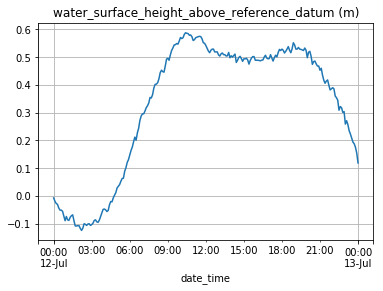

In [3]:
%matplotlib inline

col = df.columns[df.columns.str.startswith(variable)]
ax = df[col].plot.line(legend=False)
ax.grid(True)
ax.set_title(col.values[0]);

In [4]:
import folium


location = df['latitude (degree)'].unique()[0], df['longitude (degree)'].unique()[0]
m = folium.Map(location=location, zoom_start=12)
folium.Marker(location=location).add_to(m)

m